In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
from scipy import stats
from scipy.stats import norm
sns.set()
%matplotlib inline

In [2]:
raw_data=pd.read_csv('training-data.csv')
raw_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,6.60,733.500000,92.000000,7.000000,63.000000,5.300,13.275433,13.275433,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,6.48,733.600000,92.000000,6.666667,59.166667,5.200,18.606195,18.606195,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,6.37,733.700000,92.000000,6.333333,55.333333,5.100,28.642668,28.642668,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,6.25,733.800000,92.000000,6.000000,51.500000,5.000,45.410390,45.410390,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.900,10.084097,10.084097,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.800,44.919484,44.919484,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,5.90,734.100000,92.000000,5.000000,40.000000,4.700,47.233763,47.233763,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,5.92,734.166667,91.833333,5.166667,40.000000,4.680,33.039890,33.039890,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.670,31.455702,31.455702,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,5.95,734.300000,91.500000,5.500000,40.000000,4.650,3.089314,3.089314,70,40


In [3]:
testing_data = pd.read_csv('testing-data.csv')

In [4]:
testing_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,19.290000,41.400000,18.200000,41.400000,19.700000,40.663333,18.790000,38.290000,17.600000,55.590000,...,17.200000,37.790000,-0.450,756.900000,68.500000,2.500000,34.500000,-5.60,13.276836,13.276836
1,19.323333,41.400000,18.200000,41.400000,19.600000,40.590000,18.790000,38.290000,17.575000,55.567500,...,17.200000,37.790000,-0.467,756.866667,69.000000,2.333333,36.333333,-5.53,26.540440,26.540440
2,19.323333,41.400000,18.200000,41.400000,19.600000,40.590000,18.790000,38.230000,17.500000,55.466667,...,17.200000,37.700000,-0.483,756.833333,69.500000,2.166667,38.166667,-5.47,34.243045,34.243045
3,19.290000,41.400000,18.200000,41.400000,19.566667,40.590000,18.790000,38.200000,17.500000,55.384286,...,17.200000,37.700000,-0.500,756.800000,70.000000,2.000000,40.000000,-5.40,19.164170,19.164170
4,19.290000,41.400000,18.200000,41.400000,19.550000,40.672500,18.790000,38.200000,17.500000,55.326667,...,17.200000,37.590000,-0.617,756.766667,72.000000,2.000000,38.166667,-5.17,47.749400,47.749400
5,19.290000,41.290000,18.175000,41.475000,19.566667,40.700000,18.700000,38.163333,17.500000,55.234615,...,17.200000,37.590000,-0.733,756.733333,74.000000,2.000000,36.333333,-4.93,5.917829,5.917829
6,19.290000,41.290000,18.100000,41.500000,19.600000,40.590000,18.700000,38.090000,17.500000,55.200000,...,17.100000,37.500000,-0.850,756.700000,76.000000,2.000000,34.500000,-4.70,1.955003,1.955003
7,19.290000,41.290000,18.100000,41.560000,19.600000,40.590000,18.700000,38.000000,17.500000,55.175556,...,17.100000,37.500000,-0.967,756.666667,78.000000,2.000000,32.666667,-4.47,25.225252,25.225252
8,19.290000,41.290000,18.100000,41.560000,19.566667,40.626667,18.700000,38.060000,17.500000,55.090000,...,17.100000,37.400000,-1.080,756.633333,80.000000,2.000000,30.833333,-4.23,28.924128,28.924128
9,19.200000,41.200000,18.066667,41.560000,19.500000,40.700000,18.700000,38.090000,17.390000,55.000000,...,17.100000,37.400000,-1.200,756.600000,82.000000,2.000000,29.000000,-4.00,41.965195,41.965195


In [5]:
raw_data.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,...,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,21.359107,39.400205,19.691226,40.181374,21.835004,38.568716,20.497864,37.906690,19.188418,50.435273,...,5.872876,754.570321,80.648776,4.043643,38.195641,2.507957,25.077253,25.077253,100.573381,4.131178
std,1.016804,3.199261,1.470947,3.375879,1.384605,2.498782,1.258512,3.434005,1.172714,8.634783,...,4.160335,7.959809,13.537571,2.442544,12.291776,3.299076,14.430529,14.430529,104.804907,8.197825
min,18.390000,27.733333,16.200000,25.763333,19.100000,32.626667,17.290000,27.660000,16.921429,35.363333,...,-4.800000,729.300000,31.000000,0.000000,1.000000,-6.500000,0.005322,0.005322,10.000000,0.000000
25%,20.700000,37.156667,18.700000,37.966667,20.700000,36.863333,19.600000,35.200000,18.200000,45.326667,...,2.830000,749.758333,71.000000,2.000000,28.333333,0.200000,12.700376,12.700376,50.000000,0.000000
50%,21.390000,39.090000,19.600000,40.156667,21.790000,38.200000,20.500000,37.700000,19.133333,48.000000,...,5.550000,754.600000,84.000000,3.666667,40.000000,2.470000,24.997071,24.997071,60.000000,0.000000
75%,22.100000,41.500000,20.600000,42.450000,22.790000,39.900000,21.426667,40.200000,20.200000,52.500000,...,8.800000,760.400000,92.000000,5.666667,40.000000,4.630000,37.539227,37.539227,100.000000,0.000000
max,23.856667,57.496667,24.600000,56.026667,27.600000,48.530000,23.760000,49.947500,22.926667,95.802222,...,19.700000,772.300000,100.000000,14.000000,66.000000,11.400000,49.996530,49.996530,1080.000000,70.000000


In [6]:
#We need to check info() to know if there's any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 28 columns):
T1             11999 non-null float64
RH_1           11999 non-null float64
T2             11999 non-null float64
RH_2           11999 non-null float64
T3             11999 non-null float64
RH_3           11999 non-null float64
T4             11999 non-null float64
RH_4           11999 non-null float64
T5             11999 non-null float64
RH_5           11999 non-null float64
T6             11999 non-null float64
RH_6           11999 non-null float64
T7             11999 non-null float64
RH_7           11999 non-null float64
T8             11999 non-null float64
RH_8           11999 non-null float64
T9             11999 non-null float64
RH_9           11999 non-null float64
T_out          11999 non-null float64
Press_mm_hg    11999 non-null float64
RH_out         11999 non-null float64
Windspeed      11999 non-null float64
Visibility     11999 non-null float64
Tdewpoint      11

In [7]:
y=raw_data['Appliances']
x1=raw_data.loc[:, :'rv2']

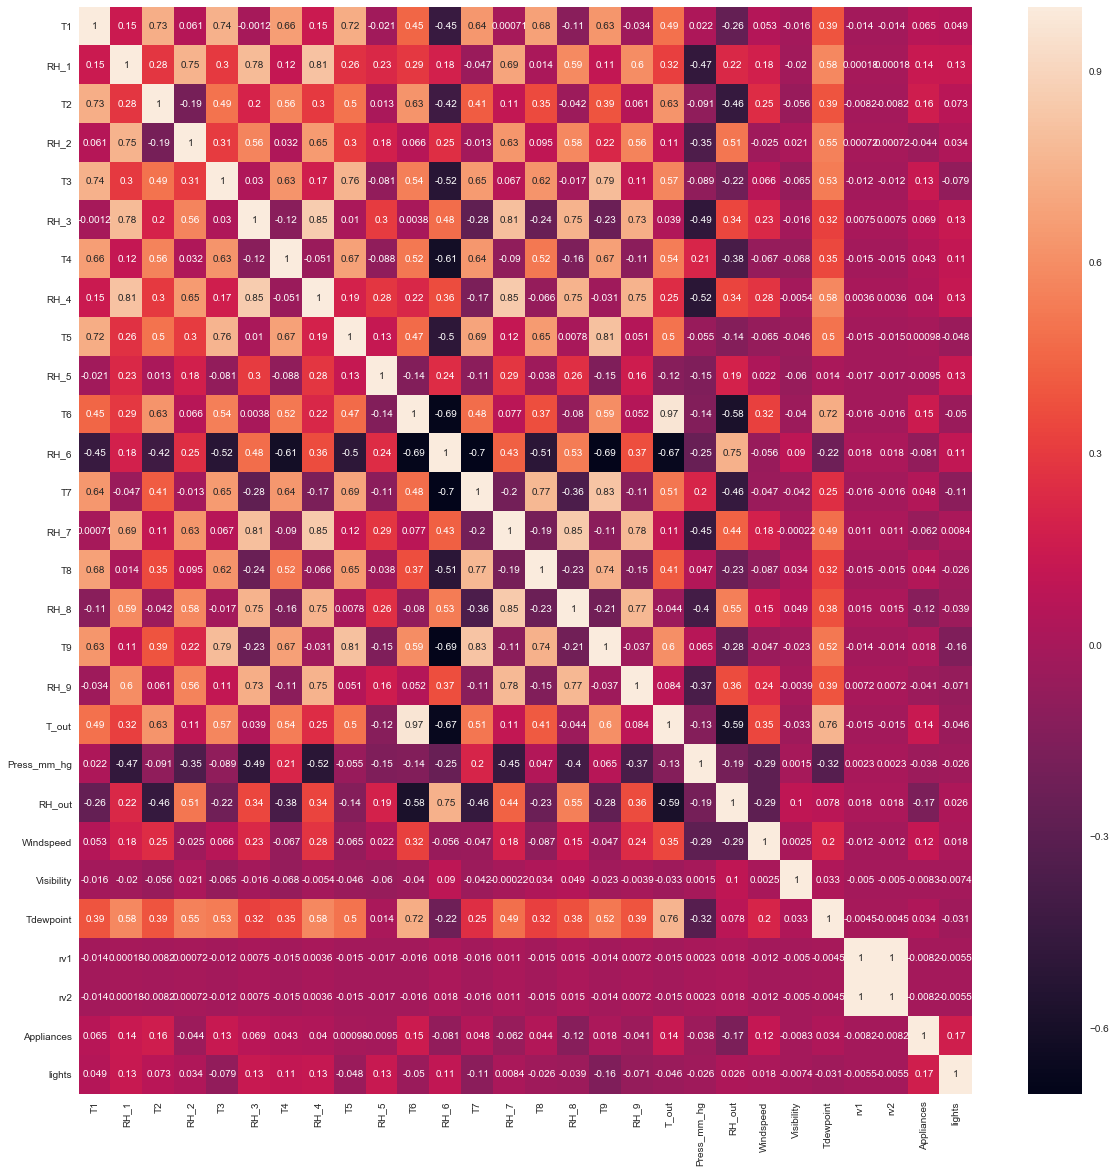

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(raw_data.corr(), annot=True, ax=ax)

## Scatter Plot
We use scatter plot to see the Correlation between Feature and Target

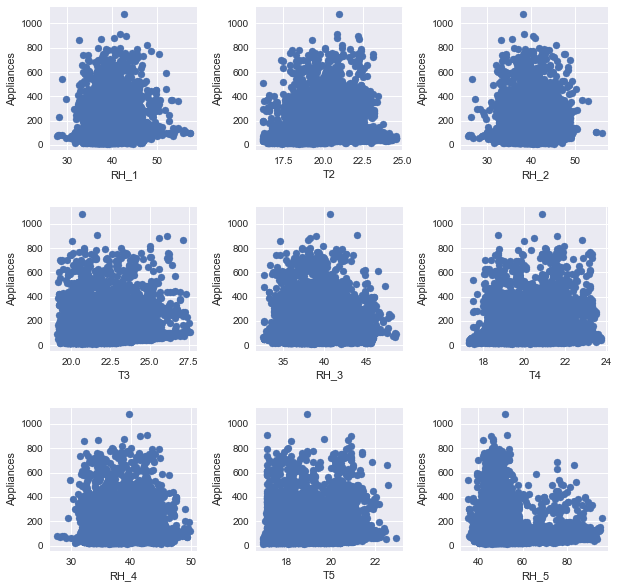

In [9]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 10):
    plt.subplot(3,3, i)
    plt.xlabel(raw_data.columns[i])
    plt.ylabel(raw_data.columns[-2])
    plt.scatter(x=raw_data.iloc[:, i], y=y)

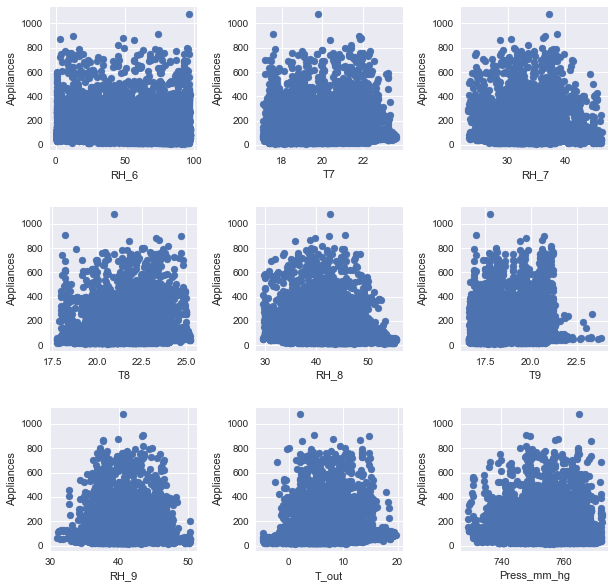

In [10]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(11, 20):
    plt.subplot(3,3, i-10)
    plt.xlabel(raw_data.columns[i])
    plt.ylabel(raw_data.columns[-2])
    plt.scatter(x=raw_data.iloc[:, i], y=y)

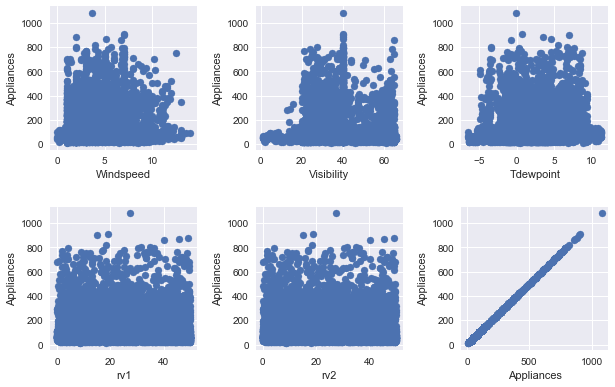

In [11]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(21, 27):
    plt.subplot(3,3, i-20)
    plt.xlabel(raw_data.columns[i])
    plt.ylabel(raw_data.columns[-2])
    plt.scatter(x=raw_data.iloc[:, i], y=y)

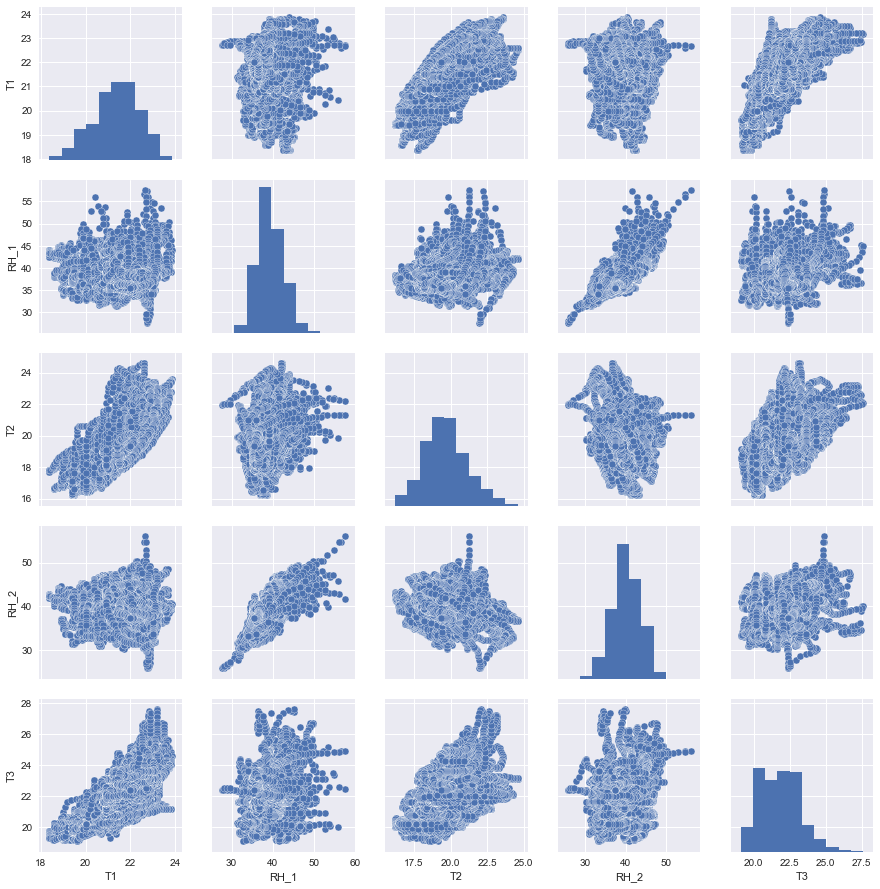

In [12]:
sns.pairplot(raw_data.iloc[:, :5]);

## Plot the Data Distribution

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/ana

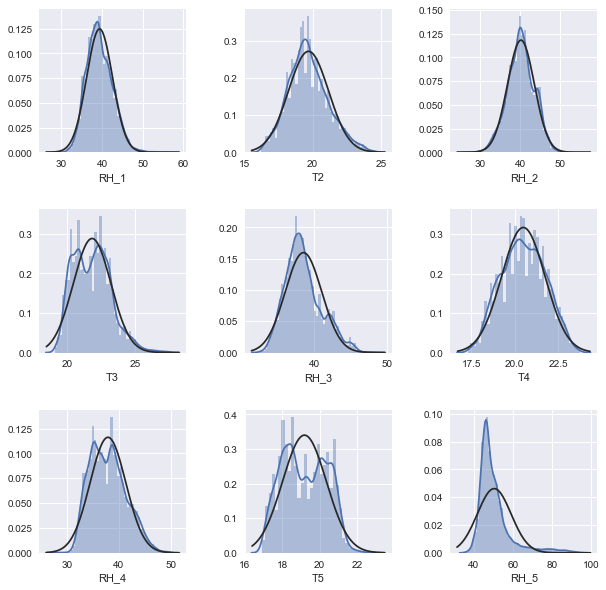

In [13]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 10):
    plt.subplot(3,3,i)
    sns.distplot(raw_data.iloc[:, i], fit=norm)

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/ana

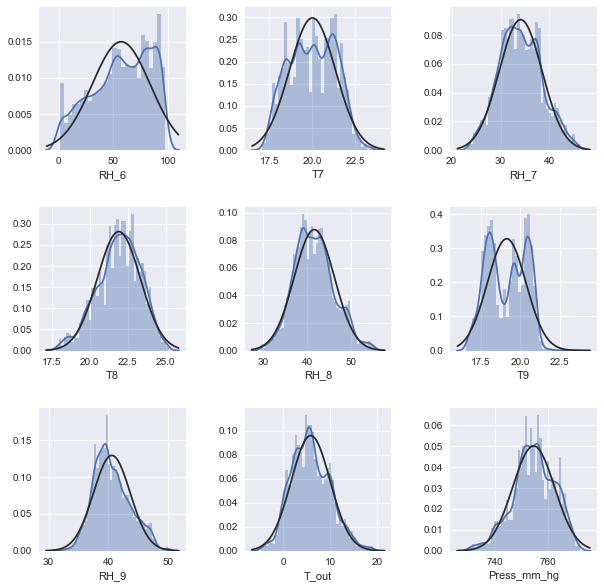

In [14]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(11, 20):
    plt.subplot(3,3,i-10)
    sns.distplot(raw_data.iloc[:, i], fit=norm)

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/ana

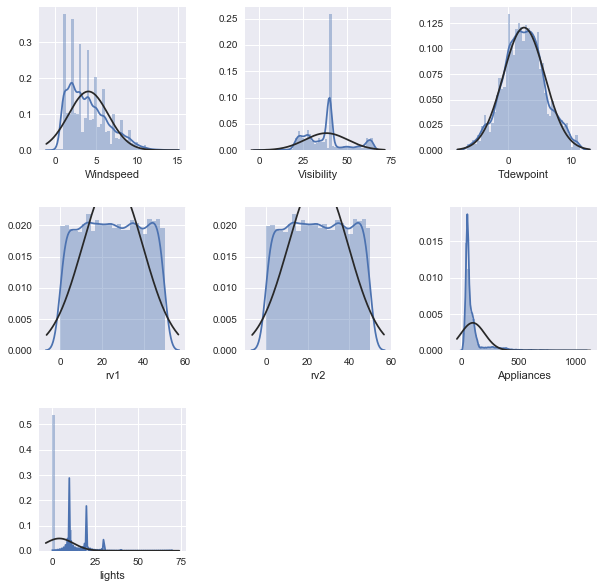

In [15]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(21, 28):
    plt.subplot(3,3,i-20)
    sns.distplot(raw_data.iloc[:, i], fit=norm)

## Normalize the Abnormal Data Distribution using Log Transformation
After visualize the data, we see that some of the features is not Normally Distributed. So we can normalize it by using log transformation.
Hence we want to list abnormal distribution of Features:
* RH_5
* Windspeed

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


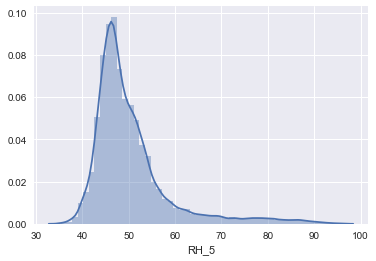

In [16]:
sns.distplot(raw_data.loc[:, 'RH_5'])

In [17]:
log_rh5 = raw_data[['RH_5']].applymap(lambda x: np.log(x+1))

In [18]:
log_rh5

,RH_5
0,4.028917
1,4.028917
2,4.026958
3,4.026958
4,4.026958
5,4.025887
6,4.024756
7,4.023564
8,4.025352
9,4.025352


/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


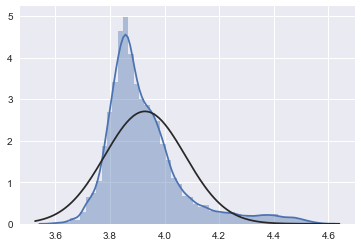

In [19]:
sns.distplot(log_rh5, fit=norm)

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


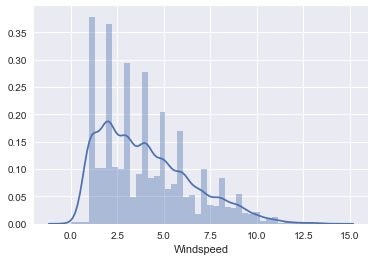

In [20]:
sns.distplot(raw_data.loc[:, 'Windspeed'])

In [21]:
log_windspeed = raw_data[['Windspeed']].applymap(lambda x: np.log(x+1))

In [22]:
log_windspeed.describe()

,Windspeed
count,11999.000000
mean,1.500432
std,0.491870
min,0.000000
25%,1.098612
50%,1.540445
75%,1.897120
max,2.708050


/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


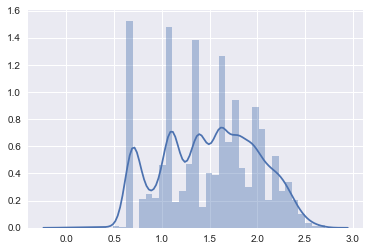

In [23]:
sns.distplot(log_windspeed)

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


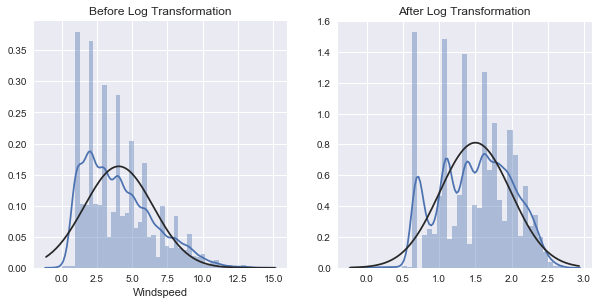

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Before Log Transformation')
sns.distplot(raw_data.loc[:, 'Windspeed'], fit=norm)

plt.subplot(2,2,2)
plt.title('After Log Transformation')
sns.distplot(log_windspeed, fit=norm)

In [25]:
copy_data = pd.DataFrame.copy(raw_data)

In [26]:
copy_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,6.60,733.500000,92.000000,7.000000,63.000000,5.300,13.275433,13.275433,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,6.48,733.600000,92.000000,6.666667,59.166667,5.200,18.606195,18.606195,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,6.37,733.700000,92.000000,6.333333,55.333333,5.100,28.642668,28.642668,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,6.25,733.800000,92.000000,6.000000,51.500000,5.000,45.410390,45.410390,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.900,10.084097,10.084097,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.800,44.919484,44.919484,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,5.90,734.100000,92.000000,5.000000,40.000000,4.700,47.233763,47.233763,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,5.92,734.166667,91.833333,5.166667,40.000000,4.680,33.039890,33.039890,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.670,31.455702,31.455702,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,5.95,734.300000,91.500000,5.500000,40.000000,4.650,3.089314,3.089314,70,40


In [27]:
copy_data['RH_5'] = log_rh5

In [28]:
copy_data['Windspeed'] = log_windspeed

In [29]:
copy_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,4.028917,...,6.60,733.500000,92.000000,2.079442,63.000000,5.300,13.275433,13.275433,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,4.028917,...,6.48,733.600000,92.000000,2.036882,59.166667,5.200,18.606195,18.606195,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,4.026958,...,6.37,733.700000,92.000000,1.992430,55.333333,5.100,28.642668,28.642668,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,4.026958,...,6.25,733.800000,92.000000,1.945910,51.500000,5.000,45.410390,45.410390,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,4.026958,...,6.13,733.900000,92.000000,1.897120,47.666667,4.900,10.084097,10.084097,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,4.025887,...,6.02,734.000000,92.000000,1.845827,43.833333,4.800,44.919484,44.919484,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,4.024756,...,5.90,734.100000,92.000000,1.791759,40.000000,4.700,47.233763,47.233763,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,4.023564,...,5.92,734.166667,91.833333,1.819158,40.000000,4.680,33.039890,33.039890,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,4.025352,...,5.93,734.233333,91.666667,1.845827,40.000000,4.670,31.455702,31.455702,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,4.025352,...,5.95,734.300000,91.500000,1.871802,40.000000,4.650,3.089314,3.089314,70,40


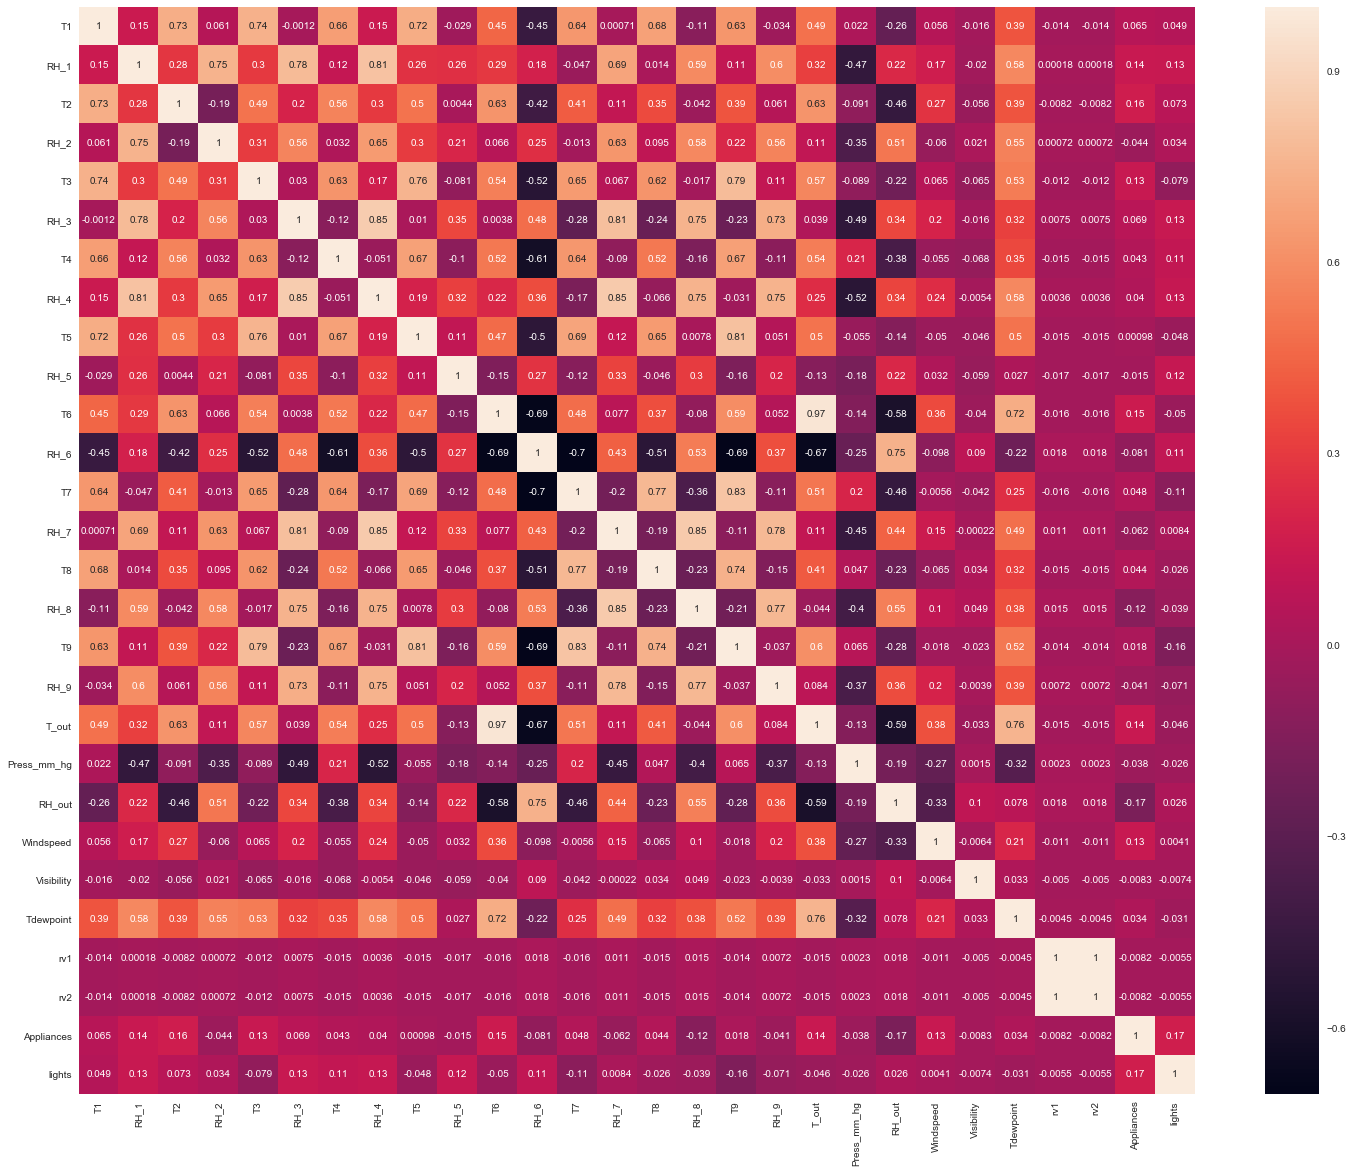

In [30]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(copy_data.corr(), annot=True, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(raw_data.corr(), annot=True, ax=ax)

## Boxplot to see the Outlier from Data

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 10):
    plt.subplot(3,3,i)
    sns.boxplot(raw_data.iloc[:, i])

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(11, 20):
    plt.subplot(3,3,i-10)
    sns.boxplot(raw_data.iloc[:, i])

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(21, 28):
    plt.subplot(3,3,i-20)
    sns.boxplot(raw_data.iloc[:, i])

## Let's Remove the Outlier
As we see from the boxplot, there are many outliers from some Features. Thus, we need to remove it. We could remove it using 2 ways:
* IQR (Q3 - Q1)
* Z-Score

In [ ]:
detect_outlier_data = pd.DataFrame.copy(raw_data)

In [ ]:
detect_outlier_data

In [ ]:
detect_outlier_data.describe()

In [ ]:
#IQR = Q3-Q1
#We could Detect Outlier using IQR (Interquartile Range)
Q1 = detect_outlier_data.quantile(0.25)
Q3 = detect_outlier_data.quantile(0.75)
IQR = Q3-Q1

In [ ]:
IQR

In [ ]:
iqr_outlier = (detect_outlier_data < (Q1 - 1.5 * IQR)) |(detect_outlier_data > (Q3 + 1.5 * IQR))

In [ ]:
iqr_outlier

In [ ]:
z = np.abs(stats.zscore(detect_outlier_data))

In [ ]:
z

In [ ]:
z < 3

## Detect Outlier using Z Score

In [ ]:
no_outlier = detect_outlier_data[(z < 3).all(axis=1)]

In [ ]:
no_outlier

In [ ]:
no_outlier.describe()

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using Z-Score', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_5'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(no_outlier.loc[:, 'RH_5'])

## Detect Outlier using IQR

In [ ]:
iqr_no_outlier = detect_outlier_data[~iqr_outlier.any(axis=1)]

In [ ]:
iqr_no_outlier

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_5'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'RH_5'])

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_1'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'RH_1'])

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_2'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'RH_2'])

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'T2'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'T2'])

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'T3'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'T3'])

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Using IQR', fontsize=18)
plt.subplot(3,2, 1)
plt.title('Before Removing Outlier')
sns.boxplot(raw_data.loc[:, 'RH_3'])

plt.subplot(3,2, 2)
plt.title('After Removing Outlier')
sns.boxplot(iqr_no_outlier.loc[:, 'RH_3'])

In [ ]:
iqr_no_outlier

In [ ]:
iqr_no_outlier.loc[:, 'Appliances'].describe()

## Transform the Response / Dependent Data
We have 2 response here, Appliances and Lights. Thus we need to transform it in order to Normal Distributed.
Based on: https://www.researchgate.net/post/Regression_tree_analysis_does_not_require_transforming_variables_but_is_it_a_problem_if_we_for_eg_log-transform_the_response_variable

In [ ]:
log_appliances = copy_data[['Appliances']].applymap(lambda x: np.log(x+1))

In [ ]:
log_appliances

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Before Log on Appliances')
sns.distplot(copy_data.loc[:, 'Appliances'], fit=norm)

plt.subplot(2,2,2)
plt.title('After Log on Appliances')
sns.distplot(log_appliances, fit=norm)

In [ ]:
log_lights = copy_data[['lights']].applymap(lambda x: np.log(x+1))

In [ ]:
log_lights

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Before Log on Lights')
sns.distplot(copy_data.loc[:, 'lights'], fit=norm)

plt.subplot(2,2,2)
plt.title('After Log on Lights')
sns.distplot(log_lights, fit=norm)

In [ ]:
raw_data.describe()

In [ ]:
log_lights.describe()

## Plot the Data Distribution after Removing the Outlier

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, 9):
    plt.subplot(3,3,i+1)
    sns.distplot(iqr_no_outlier.iloc[:, i], fit=norm)

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(10, 19):
    plt.subplot(3,3,i-9)
    sns.distplot(iqr_no_outlier.iloc[:, i], fit=norm)

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(20, 28):
    plt.subplot(3,3,i-19)
    sns.distplot(iqr_no_outlier.iloc[:, i], fit=norm)

## Normalization using Min-Max
We use the Combined data from Training and Testing.

In [ ]:
raw_data

In [ ]:
testing_data

In [ ]:
combined_data = pd.concat([raw_data.iloc[:,:24], testing_data.iloc[:,:24]]).reset_index(drop=True)

In [ ]:
combined_data

### Do the Normalization

In [ ]:
for i in range(0,24):
    combined_data.iloc[:,i] = combined_data.iloc[:,i].apply(lambda x: (x - np.min(combined_data.iloc[:,i])) / (np.max(combined_data.iloc[:,i]) - np.min(combined_data.iloc[:,i])))

In [ ]:
combined_data

In [ ]:
combined_data.iloc[:11999]

In [ ]:
combined_data.iloc[11999:]

## Save to CSV
After the Normalization, save the Dataframe into CSV

In [ ]:
training_data = pd.concat([combined_data.iloc[:11999], raw_data[['Appliances', 'lights']]], axis=1)

In [ ]:
training_data

In [ ]:
training_data.to_csv('normalisasi_training.csv')

In [ ]:
combined_data.iloc[11999:].to_csv('normalisasi_testing.csv')